In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

## Univariate Analysis

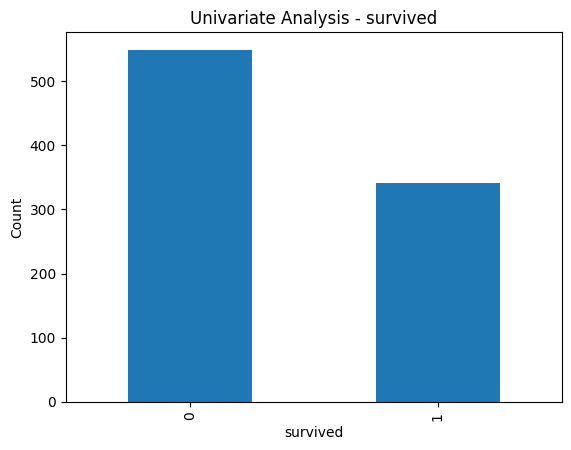

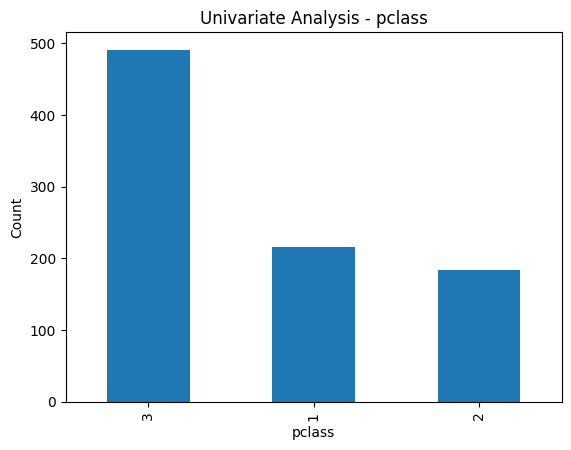

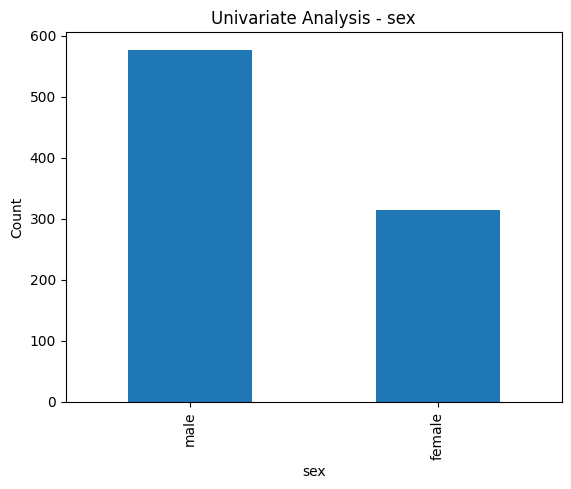

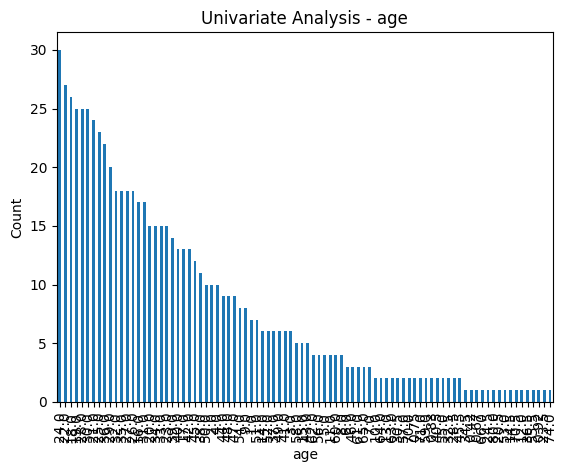

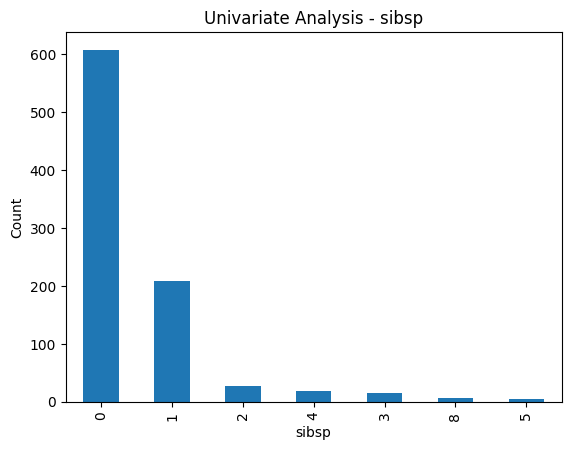

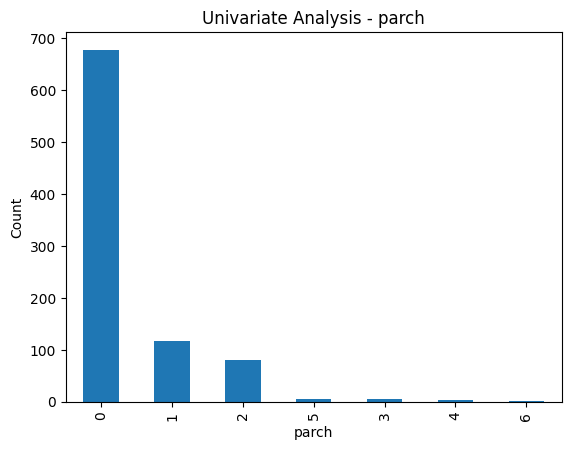

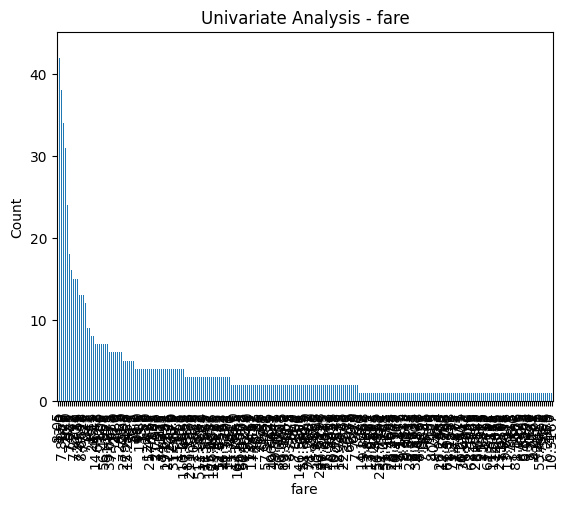

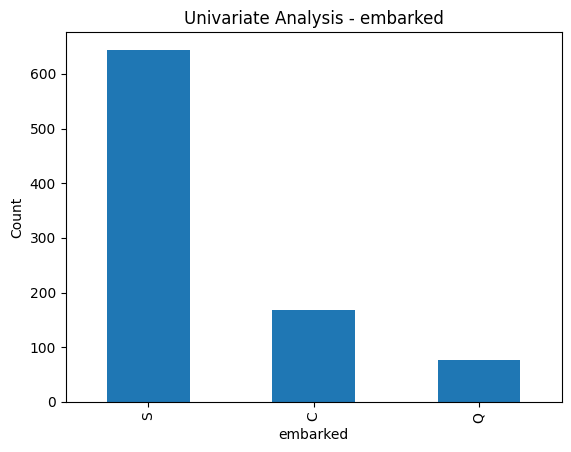

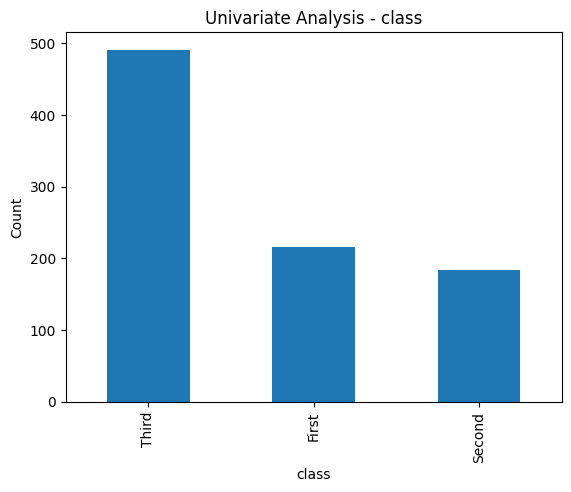

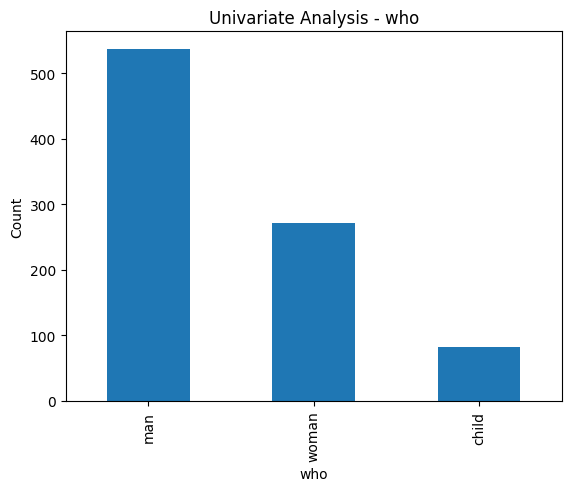

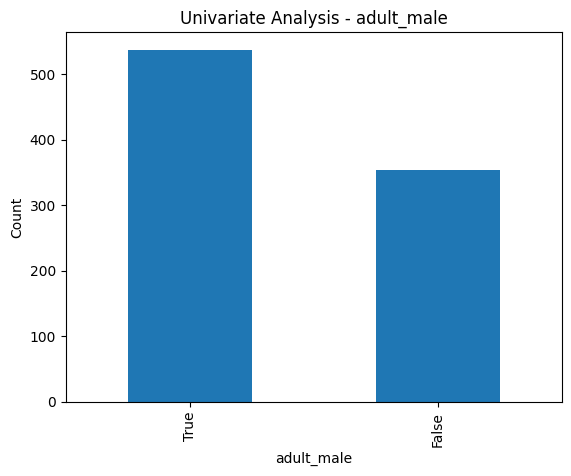

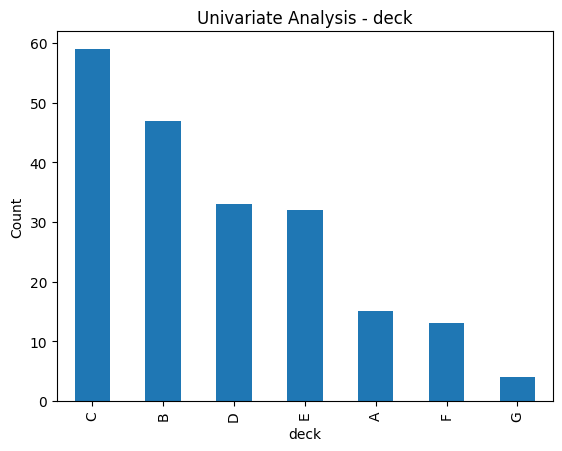

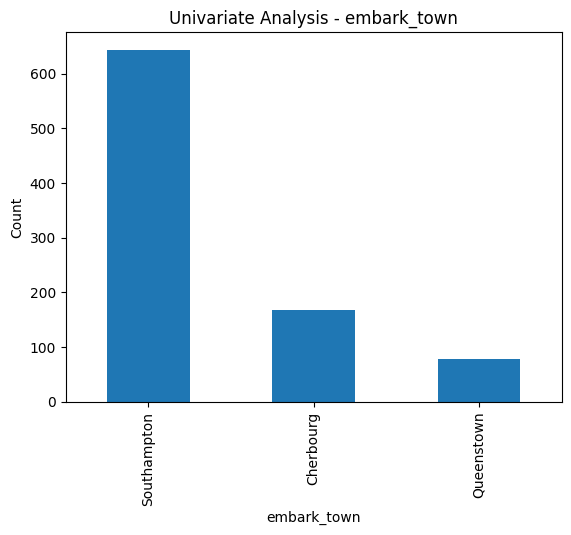

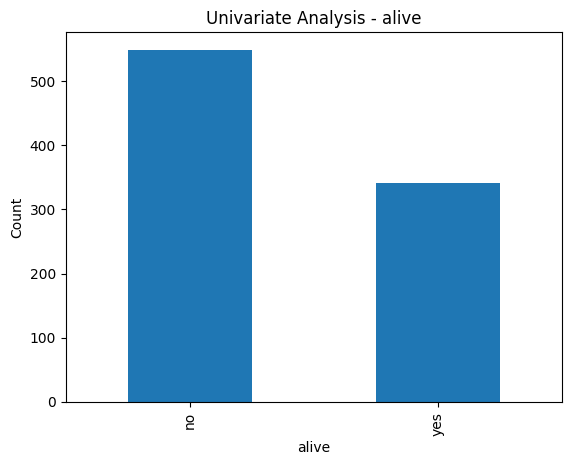

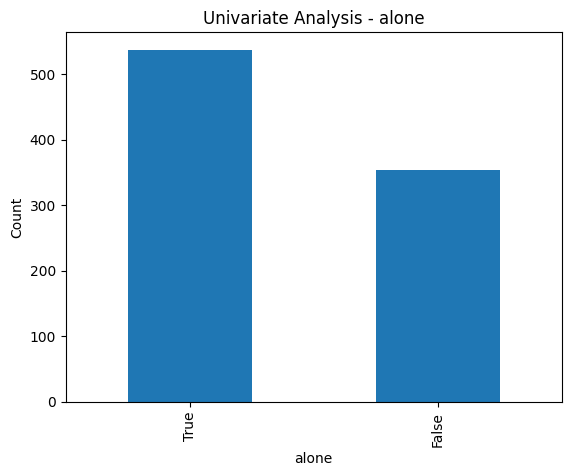

In [ ]:
df = pd.read_csv('titanic.csv')

variables = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

for variable in variables:
    value_counts = df[variable].value_counts()

    plt.figure()
    value_counts.plot(kind='bar')
    plt.title(f'Univariate Analysis - {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

## Bi - Variate Analysis

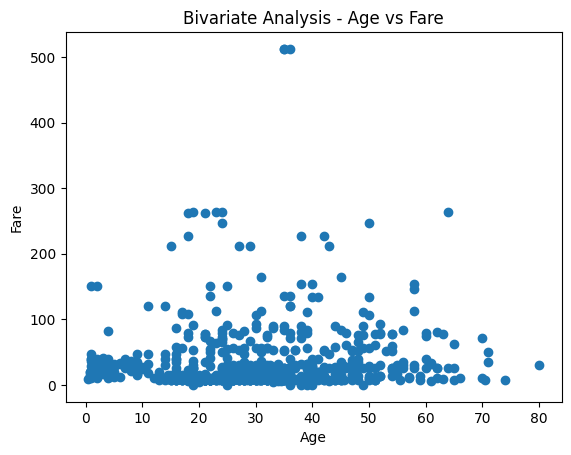

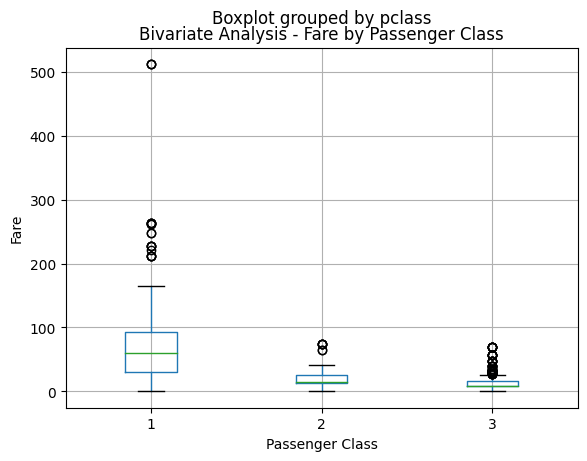

In [ ]:
plt.scatter(df['age'], df['fare'])
plt.title('Bivariate Analysis - Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

df.boxplot(column='fare', by='pclass')
plt.title('Bivariate Analysis - Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

## Multi - Variate Analysis

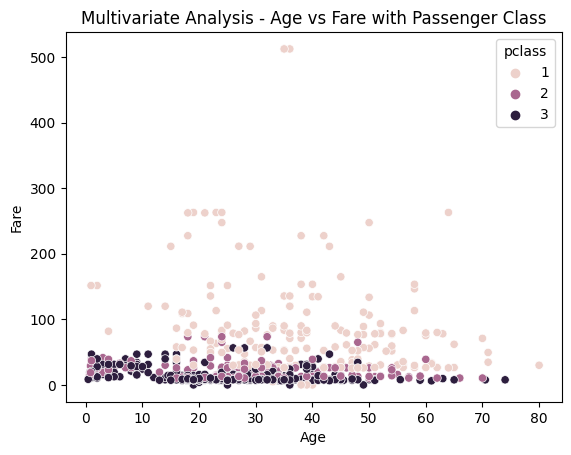

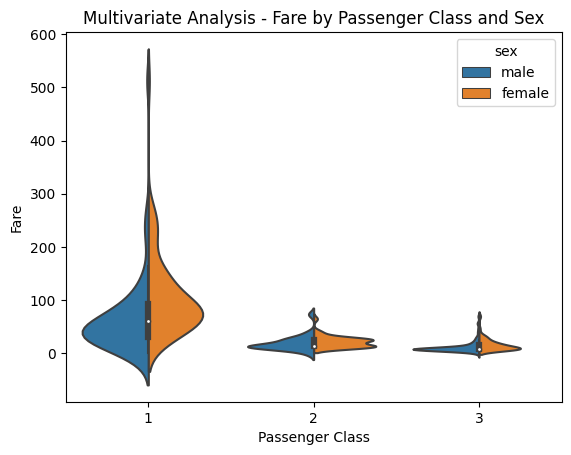

In [ ]:
sns.scatterplot(data=df, x='age', y='fare', hue='pclass')
plt.title('Multivariate Analysis - Age vs Fare with Passenger Class')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

sns.violinplot(data=df, x='pclass', y='fare', hue='sex', split=True)
plt.title('Multivariate Analysis - Fare by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

## Perform descriptive statistics on the dataset.

In [ ]:
statistics = df.describe()
print(statistics)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## Handle the Missing values.

In [ ]:
print(df)
df.fillna(df.mean(), inplace=True)
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

<ipython-input-49-fea062bb7148>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


## Find the outliers and replace the outliers

In [ ]:
numeric_columns = ['age', 'sibsp', 'parch', 'fare']
z_threshold = 3

for column in numeric_columns:
    if df[column].dtype != object:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        outliers = np.abs(z_scores) > z_threshold
        df.loc[outliers, column] = df[column].mean()

df.to_csv('modified_titanic.csv', index=False)

## Check for Categorical columns and perform encoding.

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = df[column].astype('category').cat.codes

print(df)

     survived  pclass  sex        age  sibsp  parch     fare  embarked  class  \
0           0       3    1  22.000000    1.0    0.0   7.2500         2      2   
1           1       1    0  38.000000    1.0    0.0  71.2833         0      0   
2           1       3    0  26.000000    0.0    0.0   7.9250         2      2   
3           1       1    0  35.000000    1.0    0.0  53.1000         2      0   
4           0       3    1  35.000000    0.0    0.0   8.0500         2      2   
..        ...     ...  ...        ...    ...    ...      ...       ...    ...   
886         0       2    1  27.000000    0.0    0.0  13.0000         2      1   
887         1       1    0  19.000000    0.0    0.0  30.0000         2      0   
888         0       3    0  29.699118    1.0    2.0  23.4500         2      2   
889         1       1    1  26.000000    0.0    0.0  30.0000         0      0   
890         0       3    1  32.000000    0.0    0.0   7.7500         1      2   

     who  adult_male  deck 

## Split the data into dependent and independent variables.

In [ ]:
X = df.drop('survived', axis=1)
y = df['survived']

print('Independent variables (features):\n', X)
print('\nDependent variable (target):\n', y)

Independent variables (features):
      pclass  sex        age  sibsp  parch     fare  embarked  class  who  \
0         3    1  22.000000    1.0    0.0   7.2500         2      2    1   
1         1    0  38.000000    1.0    0.0  71.2833         0      0    2   
2         3    0  26.000000    0.0    0.0   7.9250         2      2    2   
3         1    0  35.000000    1.0    0.0  53.1000         2      0    2   
4         3    1  35.000000    0.0    0.0   8.0500         2      2    1   
..      ...  ...        ...    ...    ...      ...       ...    ...  ...   
886       2    1  27.000000    0.0    0.0  13.0000         2      1    1   
887       1    0  19.000000    0.0    0.0  30.0000         2      0    2   
888       3    0  29.699118    1.0    2.0  23.4500         2      2    2   
889       1    1  26.000000    0.0    0.0  30.0000         0      0    1   
890       3    1  32.000000    0.0    0.0   7.7500         1      2    1   

     adult_male  deck  embark_town  alive  alone  
0

## Scale the independent variables

In [ ]:
X_scaled = df.drop('survived', axis=1)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_scaled)

X_scaled_df = pd.DataFrame(X_scaled, columns=df.drop('survived', axis=1).columns)

print('Scaled independent variables (features):\n', X_scaled_df)

Scaled independent variables (features):
        pclass       sex       age     sibsp     parch      fare  embarked  \
0    0.827377  0.737695 -0.592704  1.004142 -0.508188 -0.668870  0.587966   
1   -1.566107 -1.355574  0.695087  1.004142 -0.508188  1.538002 -1.912644   
2    0.827377 -1.355574 -0.270757 -0.586957 -0.508188 -0.645606  0.587966   
3   -1.566107 -1.355574  0.453626  1.004142 -0.508188  0.911325  0.587966   
4    0.827377  0.737695  0.453626 -0.586957 -0.508188 -0.641298  0.587966   
..        ...       ...       ...       ...       ...       ...       ...   
886 -0.369365  0.737695 -0.190270 -0.586957 -0.508188 -0.470699  0.587966   
887 -1.566107 -1.355574 -0.834165 -0.586957 -0.508188  0.115196  0.587966   
888  0.827377 -1.355574  0.026974  1.004142  2.683614 -0.110546  0.587966   
889 -1.566107  0.737695 -0.270757 -0.586957 -0.508188  0.115196 -1.912644   
890  0.827377  0.737695  0.212165 -0.586957 -0.508188 -0.651638 -0.662339   

        class       who  adult_ma

## Split the data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)


Training set shape: (712, 14) (712,)
Testing set shape: (179, 14) (179,)
